# Survey on Model Validation

## Sibel Eker

This notebook presents the analysis of survey data presented in 

Eker, S., Rovenskaya, E., Langan, S., Obersteiner, M. (under review) Validation of resource management models: Practice and perspectives.



## Import and prepare the data

In [1]:
directory = 'H:/MyDocuments/IIASA-validation/Interviews/Data_All_180131_AllResponses/Excel/'
file = '1801_Survey.xlsx'

import pandas as pd
df = pd.read_excel(directory+file, index_col='Respondent ID')

print(df.shape)
df.dropna(axis=0, how='all', inplace=True)
print(df.shape)
no_respondents = df.shape[0]
df.head()

(188, 43)
(164, 43)


,Academia/Research Institute,Industry,Governmental policy organization,Non-governmental policy organization,Other - organization,Role,Hydrology & water management,Agriculture & ecosystems,Energy,Urban development,...,"1. If a model is used for exploring a variety of future scenarios, its validation does not need to be different from the validation of models used for prediction or projection purposes.",2. The validation of models used for scenario exploration should be based on their output in a baseline scenario.,"3. Model output is more important than the model structure (e.g. assumptions, relationships) for the validity of models used for scenario exploration.",4. The validation of models used for scenario exploration should be based on the resulting scenario ensemble.,5. Model structure is more important than the model output for the validity of models used for scenario exploration.,Logical consistency,Plausibility (likelihood),Diversity,Plausibility (imaginability),Open-Ended Response
Respondent ID,,,,,,,,,,,,,,,,,,,,,
6656375861,Academia/Research Institute,NaN,NaN,NaN,NaN,User,NaN,NaN,NaN,Urban development,...,Disagree,Agree,Agree,Strongly agree,Disagree,3.0,1.0,2.0,4.0,Planning the future means to have an idea of t...
6623340735,Academia/Research Institute,NaN,NaN,NaN,NaN,Both,NaN,NaN,Energy,NaN,...,Agree,Agree,Disagree,Neutral,Neutral,2.0,3.0,1.0,4.0,NaN
6619263518,Academia/Research Institute,NaN,NaN,NaN,NaN,Both,NaN,Agriculture & ecosystems,NaN,NaN,...,Neutral,Agree,Neutral,Strongly agree,Neutral,2.0,3.0,4.0,1.0,NaN
6617109067,Academia/Research Institute,NaN,NaN,NaN,NaN,Both,NaN,Agriculture & ecosystems,NaN,NaN,...,Agree,Agree,Strongly disagree,Neutral,Strongly agree,1.0,2.0,4.0,3.0,NaN
6613316724,Academia/Research Institute,NaN,NaN,NaN,NaN,Both,Hydrology & water management,NaN,NaN,NaN,...,Agree,Agree,Neutral,Neutral,Neutral,2.0,1.0,4.0,3.0,At several places I couldn't decide whether I ...


In [2]:
print(no_respondents)

164


In [3]:
org_cols = ['Academia/Research Institute', 'Industry', 'Governmental policy organization', 
            'Non-governmental policy organization', 'Other - organization']

area_cols = ['Hydrology & water management', 'Agriculture & ecosystems', 'Energy', 'Urban development',
             'Transport', 'Climate', 'Demography', 'Air', 'Economy and finance', 'Social dynamics',
             'Public health', 'Other - area']

method_cols = ['Comparison to historical data', 'Expert consultation',
                                                   'Peer review', 'Sensitivity analysis / Stress testing', 
                                                   'Reality checks (whether the model produces the expected output under predefined conditions)',
                                                   'Other - method']

df[org_cols] = (df[org_cols].notnull()).astype('int')
df[area_cols] = (df[area_cols].notnull()).astype('int')
df[method_cols] = (df[method_cols].notnull()).astype('int')

df.head()

,Academia/Research Institute,Industry,Governmental policy organization,Non-governmental policy organization,Other - organization,Role,Hydrology & water management,Agriculture & ecosystems,Energy,Urban development,...,"1. If a model is used for exploring a variety of future scenarios, its validation does not need to be different from the validation of models used for prediction or projection purposes.",2. The validation of models used for scenario exploration should be based on their output in a baseline scenario.,"3. Model output is more important than the model structure (e.g. assumptions, relationships) for the validity of models used for scenario exploration.",4. The validation of models used for scenario exploration should be based on the resulting scenario ensemble.,5. Model structure is more important than the model output for the validity of models used for scenario exploration.,Logical consistency,Plausibility (likelihood),Diversity,Plausibility (imaginability),Open-Ended Response
Respondent ID,,,,,,,,,,,,,,,,,,,,,
6656375861,1,0,0,0,0,User,0,0,0,1,...,Disagree,Agree,Agree,Strongly agree,Disagree,3.0,1.0,2.0,4.0,Planning the future means to have an idea of t...
6623340735,1,0,0,0,0,Both,0,0,1,0,...,Agree,Agree,Disagree,Neutral,Neutral,2.0,3.0,1.0,4.0,NaN
6619263518,1,0,0,0,0,Both,0,1,0,0,...,Neutral,Agree,Neutral,Strongly agree,Neutral,2.0,3.0,4.0,1.0,NaN
6617109067,1,0,0,0,0,Both,0,1,0,0,...,Agree,Agree,Strongly disagree,Neutral,Strongly agree,1.0,2.0,4.0,3.0,NaN
6613316724,1,0,0,0,0,Both,1,0,0,0,...,Agree,Agree,Neutral,Neutral,Neutral,2.0,1.0,4.0,3.0,At several places I couldn't decide whether I ...


## Background information

In [5]:
# ORGANIZATION
df_org = df[org_cols]

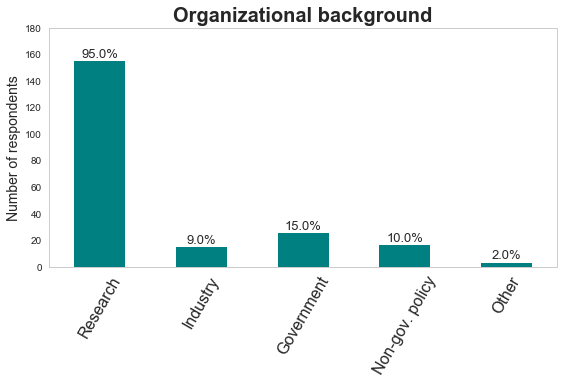

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

fig, ax = plt.subplots()

(df_org.sum(axis=0)).plot(kind='bar', ax=ax, color='teal')

percentages = round(100*(df_org.sum(axis=0))/no_respondents)

ax.grid(False)

ax.set_ylabel('Number of respondents', fontsize=14)
ax.set_title("Organizational background", fontsize=20, fontweight='bold')
ax.set_xticklabels(['Research', 'Industry', 'Government', 'Non-gov. policy', 'Other'], fontsize=16, rotation=60)
ax.grid(False)
ax.set_ylim([0, 180])
    
for patch, label in zip(ax.patches, percentages):
    height = patch.get_height()
    ax.text(patch.get_x() + patch.get_width()/2, height + .5, '{}%'.format(label), ha='center', va='bottom', fontsize=13)

plt.tight_layout()
#plt.savefig(directory+'OrganizationalBackground.png', dpi=600, )

plt.show()

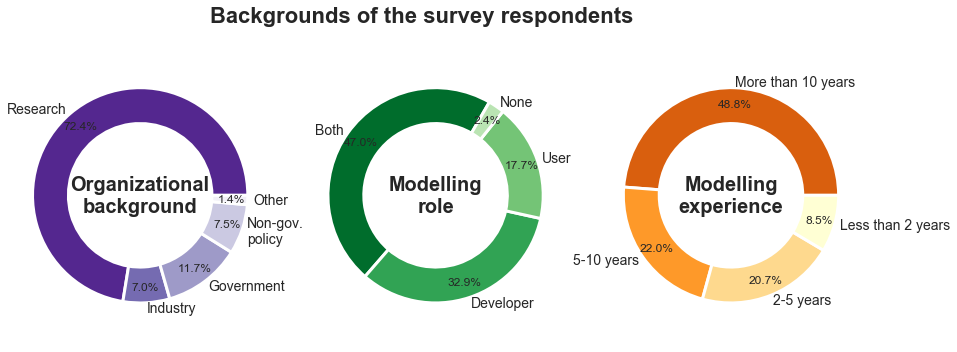

In [76]:
org_colors = reversed(['#f2f0f7', '#cbc9e2', '#9e9ac8', '#756bb1', '#54278f'])
exp_colors = ['#d95f0e', '#fe9929', '#fed98e', '#ffffd4']
role_colors = ['#006d2c', '#31a354', '#74c476', '#bae4b3']

org_sum = df_org.sum(axis=0)
role_sum = df['Role'].value_counts()
exp_sum = df['Experience'].value_counts()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
fig.set_figwidth(15)
width = 0.3

ax1.axis('equal')
ax2.axis('equal')
ax3.axis('equal')

outside1, _, fr1 = ax1.pie(org_sum, radius=.9, labels=['Research', 'Industry', 'Government', 'Non-gov.\npolicy', 'Other'], 
                      labeldistance=1.05, textprops=dict(fontsize=12),
                      autopct='%1.1f%%',
                      pctdistance=1-width/2, colors=org_colors, wedgeprops={'linewidth': 3})
for text in _:
    text.set_size(14)

outside2, _, fr2 = ax2.pie(role_sum, radius=.9, labels=role_sum.index, startangle=60, 
                     labeldistance=1.05, textprops=dict(fontsize=12),
                      autopct='%1.1f%%',
                      pctdistance=1-width/2, colors=role_colors, wedgeprops={'linewidth': 3})
for text in _:
    text.set_size(14)
    
outside3, _, fr3 = ax3.pie(exp_sum, radius=.9, labels=exp_sum.index, 
                     labeldistance=1.05, textprops=dict(fontsize=12),
                      autopct='%1.1f%%',
                      pctdistance=1-width/2, colors=exp_colors, wedgeprops={'linewidth': 3})
for text in _:
    text.set_size(14)


kwargs = dict(size=20, fontweight='bold', va='center')
ax1.text(0, 0, "Organizational\nbackground", ha='center', **kwargs)
ax2.text(0, 0, "Modelling\nrole", ha='center', **kwargs)
ax3.text(0, 0, "Modelling\nexperience", ha='center', **kwargs)

plt.setp(outside1, width=width, edgecolor='white')
plt.setp(outside2, width=width, edgecolor='white')
plt.setp(outside3, width=width, edgecolor='white')
plt.suptitle("Backgrounds of the survey respondents", fontsize=22, fontweight='bold')
plt.savefig(directory+'Backgrund_Pie.png', dpi=600, )
plt.show()

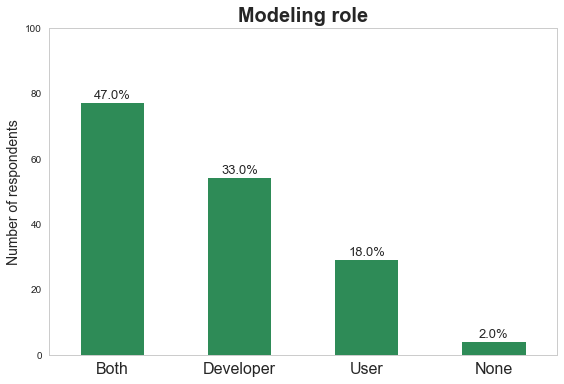

In [15]:
fig, ax = plt.subplots()

series = df['Role'].value_counts()
series.plot(kind='bar', ax=ax, color='seagreen')

percentages = round(100*(series)/no_respondents)

ax.grid(False)

ax.set_ylabel('Number of respondents', fontsize=14)
ax.set_title("Modeling role", fontsize=20, fontweight='bold')
ax.set_xticklabels(series.index, fontsize=16, rotation='horizontal')
ax.grid(False)
   
for patch, label in zip(ax.patches, percentages):
    height = patch.get_height()
    ax.text(patch.get_x() + patch.get_width()/2, height + .5, '{}%'.format(label), ha='center', va='bottom', fontsize=13)
ax.set_ylim([0, 100])
plt.tight_layout()
plt.savefig(directory+'ModelingRole.png', dpi=600, )

plt.show()

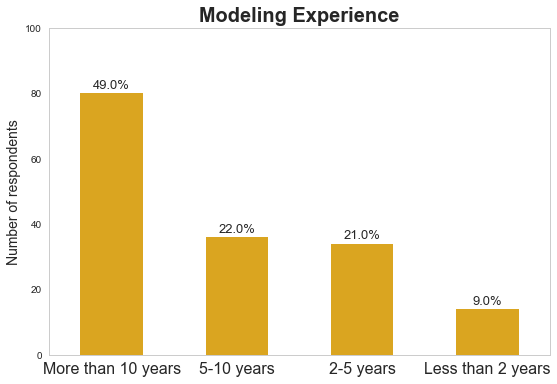

In [22]:
fig, ax = plt.subplots()

series = df['Experience'].value_counts()
series.plot(kind='bar', ax=ax, color='goldenrod')

percentages = round(100*(series)/no_respondents)

ax.grid(False)

ax.set_ylabel('Number of respondents', fontsize=14)
ax.set_title("Modeling Experience", fontsize=20, fontweight='bold')
ax.set_xticklabels(series.index, fontsize=16, rotation='horizontal')
ax.grid(False)
   
for patch, label in zip(ax.patches, percentages):
    height = patch.get_height()
    ax.text(patch.get_x() + patch.get_width()/2, height + .5, '{}%'.format(label), ha='center', va='bottom', fontsize=13)
ax.set_ylim([0, 100])
plt.tight_layout()
plt.savefig(directory+'ModelingExperience.png', dpi=600, )

plt.show()

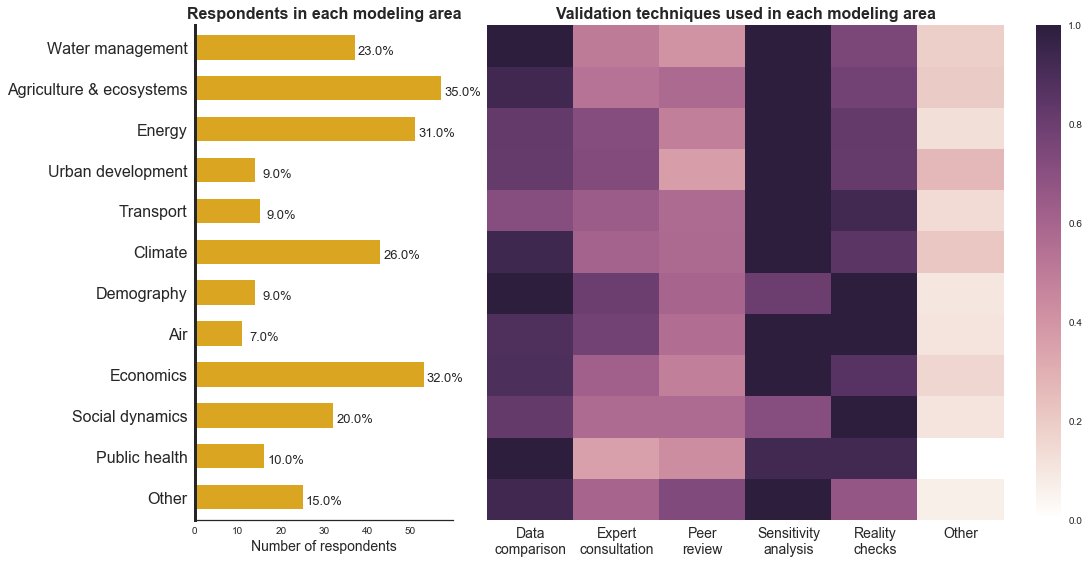

In [146]:
fig, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw = {'width_ratios':[1, 2.5]})
fig.set_figwidth(16)
fig.set_figheight(8)

sns.set_style("white")
sns.despine()


labels = ['Water management', 'Agriculture & ecosystems', 'Energy', 'Urban development',
             'Transport', 'Climate', 'Demography', 'Air', 'Economics', 'Social dynamics',
             'Public health', 'Other']
df_area = df[area_cols]
#df_area = (df_area.notnull()).astype('int')

series = df_area.sum(axis=0)
series = series.iloc[::-1]
series.plot(kind='barh', ax=ax1, color='goldenrod', width=.6, align='center')


percentages = round(100*(series)/no_respondents)
ax1.spines['left'].set_linewidth(3)

ax1.set_xlabel('Number of respondents', fontsize=14)
ax1.set_title("Respondents in each modeling area", fontsize=16, fontweight='bold')
ax1.set_yticklabels(reversed(labels), fontsize=16)#, rotation=60, ha='right')
#ax1.grid(False)
   
for patch, label in zip(ax.patches, percentages):
    height = patch.get_width()
    ax1.text(height + 5, patch.get_y(), '{}%'.format(label), ha='center', va='bottom', fontsize=13)


df_method_n = df_method_n[df_method.columns].astype(float)

ax2 = sns.heatmap(df_method_n, cmap=sns.cubehelix_palette(light=1, as_cmap=True), ax=ax2)

xlabels = ['Data\ncomparison', 'Expert\nconsultation',
           'Peer\nreview', 'Sensitivity\nanalysis', 
            'Reality\nchecks', 'Other']

ax2.set_xticklabels(xlabels, fontsize=14, rotation='horizontal')
ax2.set_yticklabels([])

ax2.set_title('Validation techniques used in each modeling area', fontsize=16, fontweight='bold')
  
      
      
      
plt.tight_layout()
plt.savefig(directory+'ModelingArea_Techniques.png', dpi=600, )

plt.show()

## Analyzing the Likert Scale Questions

### Question 5: General validation

In [2]:
replace_dic = {'Strongly disagree' : -2,
               'Disagree' : -1,
               'Neutral' : 0,
               'Agree' : 1,
               'Strongly agree' : 2}

for key, value in replace_dic.items():
    df.replace(key, value, inplace=True)
df.head()

,Academia/Research Institute,Industry,Governmental policy organization,Non-governmental policy organization,Other - organization,Role,Hydrology & water management,Agriculture & ecosystems,Energy,Urban development,...,"1. If a model is used for exploring a variety of future scenarios, its validation does not need to be different from the validation of models used for prediction or projection purposes.",2. The validation of models used for scenario exploration should be based on their output in a baseline scenario.,"3. Model output is more important than the model structure (e.g. assumptions, relationships) for the validity of models used for scenario exploration.",4. The validation of models used for scenario exploration should be based on the resulting scenario ensemble.,5. Model structure is more important than the model output for the validity of models used for scenario exploration.,Logical consistency,Plausibility (likelihood),Diversity,Plausibility (imaginability),Open-Ended Response
Respondent ID,,,,,,,,,,,,,,,,,,,,,
6656375861,Academia/Research Institute,NaN,NaN,NaN,NaN,User,NaN,NaN,NaN,Urban development,...,-1.0,1.0,1.0,2.0,-1.0,3.0,1.0,2.0,4.0,Planning the future means to have an idea of t...
6623340735,Academia/Research Institute,NaN,NaN,NaN,NaN,Both,NaN,NaN,Energy,NaN,...,1.0,1.0,-1.0,0.0,0.0,2.0,3.0,1.0,4.0,NaN
6619263518,Academia/Research Institute,NaN,NaN,NaN,NaN,Both,NaN,Agriculture & ecosystems,NaN,NaN,...,0.0,1.0,0.0,2.0,0.0,2.0,3.0,4.0,1.0,NaN
6617109067,Academia/Research Institute,NaN,NaN,NaN,NaN,Both,NaN,Agriculture & ecosystems,NaN,NaN,...,1.0,1.0,-2.0,0.0,2.0,1.0,2.0,4.0,3.0,NaN
6613316724,Academia/Research Institute,NaN,NaN,NaN,NaN,Both,Hydrology & water management,NaN,NaN,NaN,...,1.0,1.0,0.0,0.0,0.0,2.0,1.0,4.0,3.0,At several places I couldn't decide whether I ...


C:\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


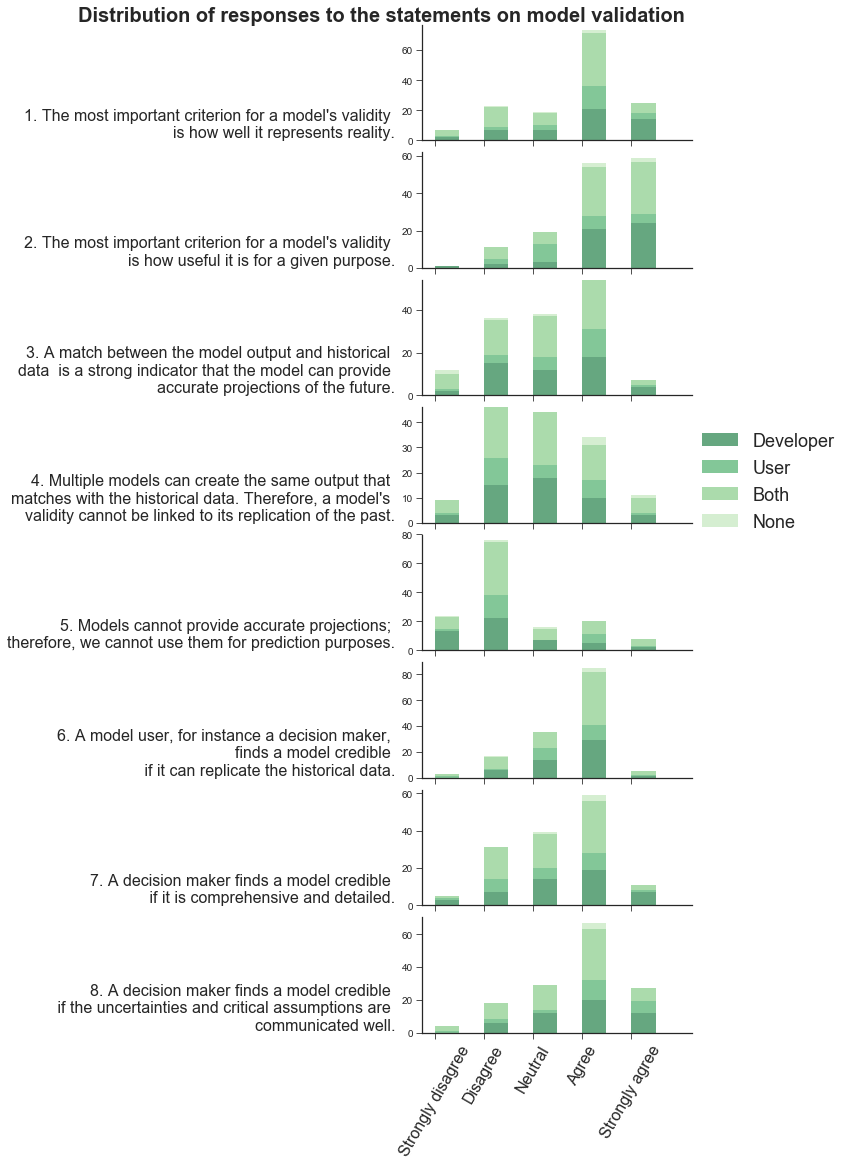

In [21]:
#make grid of 8 rows, each row corresponding to a statement
#a histogram in each row, 5 agree/disagree
import seaborn as sns
import matplotlib.pyplot as plt
questions = ["1. The most important criterion for a model's validity is how well it represents reality.",
             "2. The most important criterion for a model's validity is how useful it is for a given purpose.",
             '3. A match between the model output and historical data is a strong indicator that the model can provide accurate projections of the future.',
             "4. Multiple models can create the same output that matches with the historical data. Therefore, a model's validity cannot be linked to its replication of the past.",
             "5. Models cannot provide accurate projections; therefore, we cannot use them for prediction purposes.",
             '6. A model user, for instance a decision maker, finds a model credible if it can replicate the historical data.',
             '7. A decision maker finds a model credible if it is comprehensive and detailed.',
             '8. A decision maker finds a model credible if the uncertainties and critical assumptions are communicated well.']

y_labels = ["1. The most important criterion for a model's validity \nis how well it represents reality.",
             "2. The most important criterion for a model's validity \nis how useful it is for a given purpose.",
             '3. A match between the model output and historical \ndata  is a strong indicator that the model can provide \naccurate projections of the future.',
             "4. Multiple models can create the same output that \nmatches with the historical data. Therefore, a model's \nvalidity cannot be linked to its replication of the past.",
             '5. Models cannot provide accurate projections; \ntherefore, we cannot use them for prediction purposes.',
             '6. A model user, for instance a decision maker, \nfinds a model credible \n if it can replicate the historical data.',
             '7. A decision maker finds a model credible \n if it is comprehensive and detailed.',
             '8. A decision maker finds a model credible \n if the uncertainties and critical assumptions are \ncommunicated well.']
role_colors = ['#006d2c', '#31a354', '#74c476', '#bae4b3']

no_questions = len(questions)

sns.set_style("ticks")
figure = plt.figure()
figure.set_figwidth(10)
figure.set_figheight(16)

#attribute = ['More than 10 years', '5-10 years', '2-5 years', 'Less than 2 years']
attribute = ['Developer', 'User', 'Both', 'None']
for i in range(no_questions):
    ax = plt.subplot(no_questions, 1, i+1)
    if i == 0:
        ax.set_title("Distribution of responses to the statements on model validation", 
                     fontsize=20, fontweight='bold', x=-0.15, y=0.98)
    df_data = df[questions[i]].dropna(axis=0)
    
    ax.set_xticks([-2, -1, 0, 1, 2])
    #ax.set_xlim([-2.75, 2.75])
    if i != 7:
        ax.set_xticklabels([])
    else:
        ax.set_xticklabels(replace_dic.keys(), fontsize=16, rotation=60)
    #sns.distplot(df_data, kde=False, ax=ax, hist_kws={"color":"r","alpha":0.3})
    ax.hist([df_data[df['Role']==exp] for exp in attribute], 
            bins=[-2, -1, 0, 1, 2, 3], stacked=True, alpha=0.6, width=.5, label=attribute, color=role_colors)

    ax.set_ylabel(y_labels[i], fontsize=16, rotation='horizontal', ha='right', labelpad=0.1)
    ax.yaxis.set_label_coords(-0.1,0)
    if i == 3:
        ax.legend(loc=2, scatterpoints = 1, fontsize=18, bbox_to_anchor=(1.01, 0.85), borderaxespad=0.)
    sns.despine()


#plt.subplots_adjust(top=0.99)
plt.tight_layout(pad=0)   

#plt.savefig(directory+'Question5_validation_statements_role.png', dpi=600, bbox_inches='tight')

plt.show()
    
    


### Question 7: Validation in the scenario context

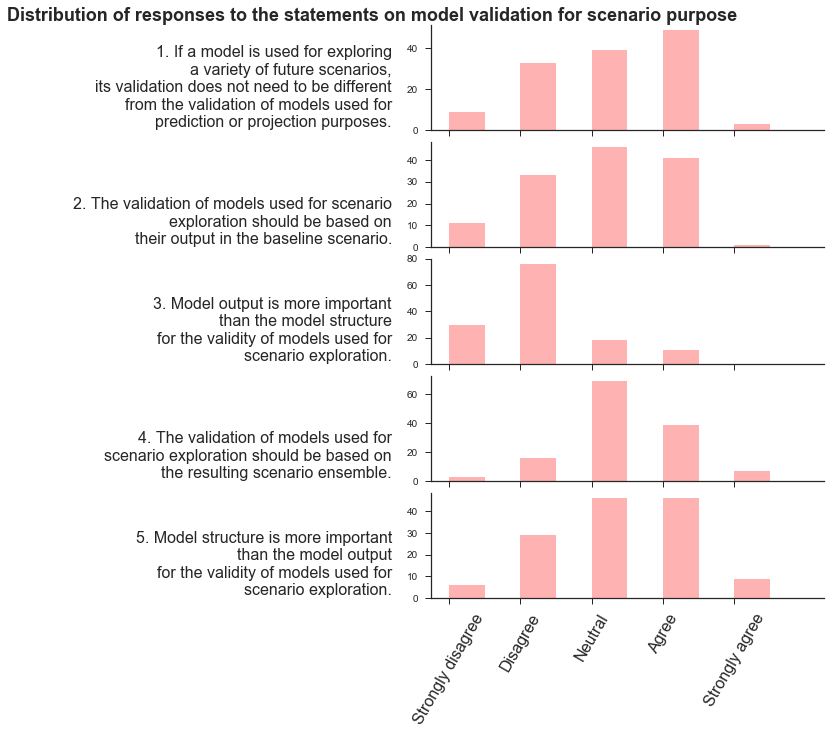

In [49]:

import matplotlib.gridspec as gridspec


questions = questions7
y_labels = y_labels7
no_questions = len(questions)

sns.set_style("ticks")
figure = plt.figure()
figure.set_figwidth(12)
figure.set_figheight(10)

for i in range(no_questions):
    ax = plt.subplot(no_questions, 1, i+1)
    if i == 0:
        ax.set_title("Distribution of responses to the statements on model validation for scenario purpose", 
                     fontsize=18, fontweight='bold', x=-0.15, y=0.98)
    df_data = df[questions[i]].dropna(axis=0)
    
    ax.set_xticks([-2, -1, 0, 1, 2])
    #ax.set_xlim([-2.75, 2.75])
    if i != no_questions-1:
        ax.set_xticklabels([])
    else:
        ax.set_xticklabels(replace_dic.keys(), fontsize=16, rotation=60)
    #sns.distplot(df_data, kde=False, ax=ax, hist_kws={"color":"r","alpha":0.3})
    ax.hist(df_data, bins=[-2, -1, 0, 1, 2, 3], facecolor='r', alpha=0.3, width=.5)
    ax.set_ylabel(y_labels[i], fontsize=16, rotation='horizontal', ha='right', labelpad=0.1)
    ax.yaxis.set_label_coords(-0.1,0)
    sns.despine()

plt.tight_layout(pad=0)   

plt.savefig(directory+'Question7_validation_scenarios.png', dpi=600, )

plt.show()

In [3]:
#DIVIDE THE QUESTIONS (Y LABELS) INTO EQUAL LINES
y_labels5 = []
y_labels7 = []

questions5 = ["1. The most important criterion for a model's validity is how well it represents reality.",
             "2. The most important criterion for a model's validity is how useful it is for a given purpose.",
             '3. A match between the model output and historical data is a strong indicator that the model can provide accurate projections of the future.',
             "4. Multiple models can create the same output that matches with the historical data. Therefore, a model's validity cannot be linked to its replication of the past.",
             '5. Models cannot provide accurate projections; therefore, we cannot use them for prediction purposes.',
             '6. A model user, for instance a decision maker, finds a model credible if it can replicate the historical data.',
             '7. A decision maker finds a model credible if it is comprehensive and detailed.',
             '8. A decision maker finds a model credible if the uncertainties and critical assumptions are communicated well.']

questions7 = ["1. If a model is used for exploring a variety of future scenarios, its validation does not need to be different from the validation of models used for prediction or projection purposes.", 
             "2. The validation of models used for scenario exploration should be based on their output in a baseline scenario.",
             "3. Model output is more important than the model structure (e.g. assumptions, relationships) for the validity of models used for scenario exploration.",
             "4. The validation of models used for scenario exploration should be based on the resulting scenario ensemble.",
             "5. Model structure is more important than the model output for the validity of models used for scenario exploration."]

import textwrap

for question in questions5:
    #if len(question) < 100:
    lines = textwrap.wrap(question, 60)
    #else:
    #    lines = textwrap.wrap(question, int(len(question)/2))
    label = '\n'.join(lines)
    y_labels5.append(label)
    
for question in questions7:
    lines = textwrap.wrap(question, 60)
    label = '\n'.join(lines)
    y_labels7.append(label)

In [5]:
p_df = pd.read_excel(directory+'Q5_test_of_independence.xlsx')

#p_df['Factor']

In [13]:
questions = questions5
df_q = pd.DataFrame(index = questions, columns=replace_dic.values())
for index, row in df_q.iterrows():
    df_q.loc[index] = df[index].value_counts()
    row_sum = df_q.loc[index].sum()
    df_q.loc[index] = df_q.loc[index] / row_sum 
df_q.columns = replace_dic.keys()

In [46]:
df_q.iloc[::-1]

,Strongly disagree,Disagree,Neutral,Agree,Strongly agree
8. A decision maker finds a model credible if the uncertainties and critical assumptions are communicated well.,0.0275862,0.124138,0.2,0.462069,0.186207
7. A decision maker finds a model credible if it is comprehensive and detailed.,0.0344828,0.213793,0.268966,0.406897,0.0758621
"6. A model user, for instance a decision maker, finds a model credible if it can replicate the historical data.",0.0206897,0.117241,0.241379,0.586207,0.0344828
"5. Models cannot provide accurate projections; therefore, we cannot use them for prediction purposes.",0.166667,0.527778,0.111111,0.138889,0.0555556
"4. Multiple models can create the same output that matches with the historical data. Therefore, a model's validity cannot be linked to its replication of the past.",0.0625,0.319444,0.305556,0.236111,0.0763889
3. A match between the model output and historical data is a strong indicator that the model can provide accurate projections of the future.,0.0816327,0.244898,0.258503,0.367347,0.047619
2. The most important criterion for a model's validity is how useful it is for a given purpose.,0.00684932,0.0753425,0.130137,0.383562,0.40411
1. The most important criterion for a model's validity is how well it represents reality.,0.047619,0.156463,0.129252,0.496599,0.170068


In [7]:
questions = questions7
df_q7 = pd.DataFrame(index = questions, columns=replace_dic.values())
for index, row in df_q7.iterrows():
    df_q7.loc[index] = df[index].value_counts()
    row_sum = df_q7.loc[index].sum()
    df_q7.loc[index] = df_q7.loc[index] / row_sum 
df_q7 = df_q7.fillna(0)
df_q7.columns = replace_dic.keys()
df_q7

,Strongly disagree,Disagree,Neutral,Agree,Strongly agree
"1. If a model is used for exploring a variety of future scenarios, its validation does not need to be different from the validation of models used for prediction or projection purposes.",0.067669,0.248120,0.293233,0.368421,0.022556
2. The validation of models used for scenario exploration should be based on their output in a baseline scenario.,0.083333,0.250000,0.348485,0.310606,0.007576
"3. Model output is more important than the model structure (e.g. assumptions, relationships) for the validity of models used for scenario exploration.",0.222222,0.562963,0.133333,0.081481,0.000000
4. The validation of models used for scenario exploration should be based on the resulting scenario ensemble.,0.022388,0.119403,0.514925,0.291045,0.052239
5. Model structure is more important than the model output for the validity of models used for scenario exploration.,0.044118,0.213235,0.338235,0.338235,0.066176


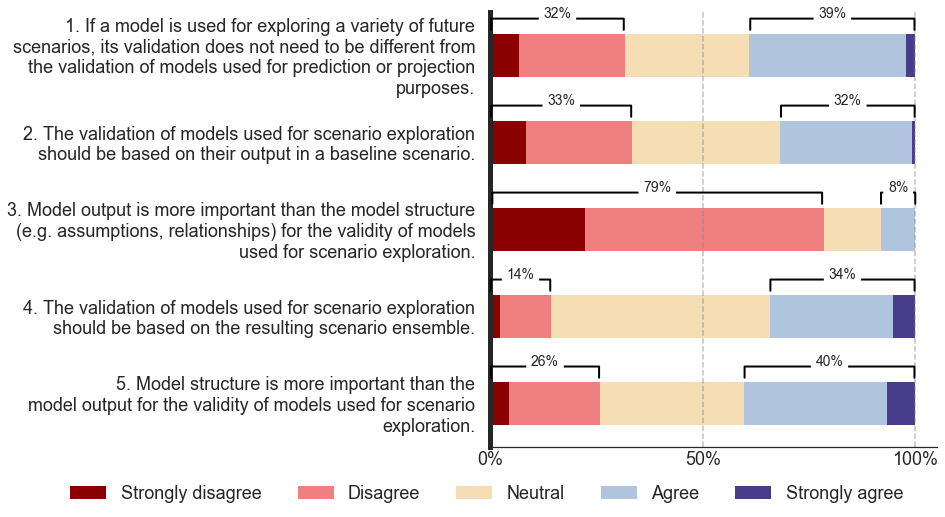

In [78]:
#VISUALIZE LIKERT SCALE
# see the likert scale figure here: 
# https://www.nature.com/nature/journal/v550/n7677/full/nj7677-549a.html?WT.mc_id=TWT_NatureNews&sf126538253=1

import seaborn as sns
import matplotlib.pyplot as plt
import pylab as plx

colors = ['darkred', 'lightcoral', 'wheat', 'lightsteelblue', 'darkslateblue']




questions = questions7
y_labels = y_labels7

no_questions = len(questions)

sns.set_style("white")
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(8)

ax.axvline(x=0.5, ls='dashed', color='grey', alpha=.5)
ax.axvline(x=1, ls='dashed', color='grey', alpha=.5)
df_q7[::-1].plot(ax=ax, kind='barh', stacked=True, color = colors, width=.5)

ax.set_xticks([0, .5, 1])
ax.set_xticklabels(['0%', '50%', '100%'], fontsize=18)
ax.legend(loc=4, ncol=5, fontsize=18, borderaxespad=-3.5, bbox_to_anchor=(.8, 0))

ax.set_yticklabels(reversed(y_labels), fontsize=18)
ax.tick_params(axis='y', which='major', pad=15)
ax.spines['left'].set_linewidth(5)
sns.despine()

#annotate
q = 0
for index, row in df_q7[::-1].iterrows():
    #agree
    start = row['Strongly disagree'] + row['Disagree'] + row['Neutral']
    end = 1
    x = (start+end) / 2
    text = row['Strongly agree'] + row['Agree']
    ax.annotate("{:.0f}%".format(100*text), xy=(x, q+.4), 
                fontsize=14, ha='center', va='bottom',
                bbox=dict(boxstyle='round', fc='white', ec='white'),
                arrowprops=dict(arrowstyle='-[, widthB={}, lengthB=.8'.format(15*(1-start)), lw=2.0))
    #disagree
    start = 0
    end = row['Strongly disagree'] + row['Disagree']
    x = (start+end) / 2
    text = row['Strongly disagree'] + row['Disagree']
    ax.annotate("{:.0f}%".format(100*text), xy=(x, q+.4), 
                fontsize=14, ha='center', va='bottom',
                bbox=dict(boxstyle='round', fc='white', ec='white'),
                arrowprops=dict(arrowstyle='-[, widthB={}, lengthB=.8'.format(15*(end)), lw=2.0))
    q += 1


#plt.subplots_adjust(top=0.99)  

plt.savefig(directory+'Question7_Likert_v2.png', dpi=600, bbox_inches='tight')

plt.show()



## Tests of independence

The most common trst for independence is Pearson's Chis-squared test, but it does not apply to the cases where any frequency is less than 5. In my data, the observed frequency is less than 5 for many cases, therefore I use "Fisher's exact test" (https://en.wikipedia.org/wiki/Fisher%27s_exact_test). Scipy has a function for Fisher's exact test for 2x2 contingency tables, which is not useful for me. Two options: 

1) Use rpy2 to use R functions (R has a Fisher test function for mxn tables) (add the stats package directory to the system path)

2) Use this Python implementation of Fisher's test, which requires a Fortran compiler: https://github.com/maclandrol/FisherExact

My Fortran installation didn't work because of 32 vs. 64 bit issues, but the R option is working. Still, there is a memory problem with my matrix sizes (e.g. 4x5), therefore I use the simulate_p_values option!


Below, for each question and factor (experience, role, organization),

    - will keep the results in a dictionary or df
    
    - make a contingency table
    
    - calculate chi-squared p, set in the df or dict
    
    - convert the df to r matrix
    
    - calculate fisher p, set in the df or dict



In [4]:
import os
os.environ['R_USER'] = 'C:/Users/eker/AppData/Local/Continuum/Anaconda3/Lib/site-packages/rpy2'

from scipy.stats import chi2_contingency

import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
from rpy2.robjects import r, pandas2ri

stats = importr('stats')
pandas2ri.activate()

In [8]:
experience = ['More than 10 years', '5-10 years', '2-5 years', 'Less than 2 years']
role = ['Developer', 'User', 'Both', 'None']
background = ['Academia/Research Institute', 'Non-academia']

In [17]:
questions = questions5
writer = pd.ExcelWriter(directory+'Contingency_Q5_v2.xlsx', engine='xlsxwriter')
workbook = writer.book

df_indep = pd.DataFrame(columns=['Question', 'Factor', 'Chi', 'p_Chi', 'p_Fisher'])
factors = {'Role' : role, 'Experience': experience, 'Organization':background}

for q, question in enumerate(questions):
    
    for factor, elements in factors.items():
        
        # make a contingency table 
        contingency = {}
        df_data = df[question].dropna(axis=0)
        
        #make a different one for academia/non-academia
        if factor == 'Organization':
            contingency['Academia/Research Institute'] = df_data[df['Academia/Research Institute']=='Academia/Research Institute'].value_counts()
            contingency['Non-academia'] = df_data[df['Academia/Research Institute']!='Academia/Research Institute'].value_counts()
            
        else:
            for r in elements:
                contingency[r] = df_data[df[factor]==r].value_counts()
        df_contingency = pd.DataFrame.from_dict(contingency, orient='index')
        df_contingency.fillna(0, inplace=True)
        inv_rep_dic = {v:k for k,v in replace_dic.items()}
        df_contingency = df_contingency.rename(columns = inv_rep_dic)
        print(q, factor)
        print(df_contingency)
        df_contingency.to_excel(writer, sheet_name='Q_{}_{}'.format(q+1,factor))
        
        #calculate chi-squared test results
        chi, p_chi, dof, expected = chi2_contingency(df_contingency)
        
        #calculate fisher's exact test results
        df_r = pandas2ri.py2ri(df_contingency)
        res = stats.fisher_test(df_r, simulate_p_value=True, B=1e8)
        p_fisher = res[0][0]
        #set the results in df_indep
        row = pd.Series([question, factor, chi, p_chi, p_fisher])
        df_indep = df_indep.append(row, ignore_index=True)        
writer.save()
df_indep.to_excel(directory+'Q5_test_of_independence_v2.xlsx')


0 Role
           Agree  Strongly agree  Disagree  Neutral  Strongly disagree
Both          35             7.0        13        8                4.0
Developer     21            14.0         7        7                2.0
None           2             0.0         1        1                0.0
User          15             4.0         2        3                1.0
0 

C:\Users\eker\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\frame.py:4626: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  other.index).difference(self.columns).tolist()


Experience
                    Agree  Strongly agree  Disagree  Neutral  \
2-5 years              20               3         1        2   
5-10 years             13               6         9        4   
Less than 2 years       6               1         3        3   
More than 10 years     34              15        10       10   

                    Strongly disagree  
2-5 years                         1.0  
5-10 years                        2.0  
Less than 2 years                 0.0  
More than 10 years                4.0  
0 Organization
                             Agree  Strongly agree  Disagree  Neutral  \
Academia/Research Institute     68              23      23.0       18   
Non-academia                     5               2       0.0        1   

                             Strongly disagree  
Academia/Research Institute                7.0  
Non-academia                               0.0  
1 Role
           Strongly agree  Agree  Neutral  Disagree  Strongly disagree
Both    

6 Organization
                             Agree  Neutral  Disagree  Strongly agree  \
Academia/Research Institute     56       38        29               9   
Non-academia                     3        1         2               2   

                             Strongly disagree  
Academia/Research Institute                5.0  
Non-academia                               0.0  
7 Role
           Agree  Strongly agree  Neutral  Disagree  Strongly disagree
Both          31             8.0     15.0      10.0                3.0
Developer     20            12.0     12.0       6.0                0.0
None           4             0.0      0.0       0.0                0.0
User          12             7.0      2.0       2.0                1.0
7 Experience
                    Agree  Neutral  Strongly agree  Disagree  \
2-5 years              12      5.0               4       4.0   
5-10 years              7      9.0              10       6.0   
Less than 2 years       9      0.0               3 

C:\Users\eker\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\frame.py:4626: RuntimeWarning: '>' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  other.index).difference(self.columns).tolist()


In [158]:
#VISUALIZE THE IMPORTANT DEPENDENCIES

#likert scale for each question, with rows for each factor

#get the contingency table from excel, then visualize 

##QUESTION 5
question = 8
factor = 'Experience'
df_con = pd.read_excel(directory+'Contingency_Q5.xlsx', sheetname="Q_{}_{}".format(question, factor))
print(df_con)
for index, row in df_con.iterrows():
    row_sum = df_con.loc[index].sum()
    df_con.loc[index] = df_con.loc[index] / row_sum 
df_con = df_con.fillna(0)

df_con = df_con.reindex_axis(df_q7.columns, axis=1)
experience = ['More than 10 years', '5-10 years', '2-5 years', 'Less than 2 years']
role = ['Developer', 'User', 'Both', 'None']
df_con = df_con.reindex_axis(experience, axis=0)
df_con



                    Agree  Neutral  Strongly agree  Disagree  \
2-5 years              12        5               4         4   
5-10 years              7        9              10         6   
Less than 2 years       9        0               3         0   
More than 10 years     39       15              10         8   

                    Strongly disagree  
2-5 years                           1  
5-10 years                          2  
Less than 2 years                   0  
More than 10 years                  1  


,Strongly disagree,Disagree,Neutral,Agree,Strongly agree
More than 10 years,0.013699,0.109589,0.205479,0.534247,0.136986
5-10 years,0.058824,0.176471,0.264706,0.205882,0.294118
2-5 years,0.038462,0.153846,0.192308,0.461538,0.153846
Less than 2 years,0.000000,0.000000,0.000000,0.750000,0.250000


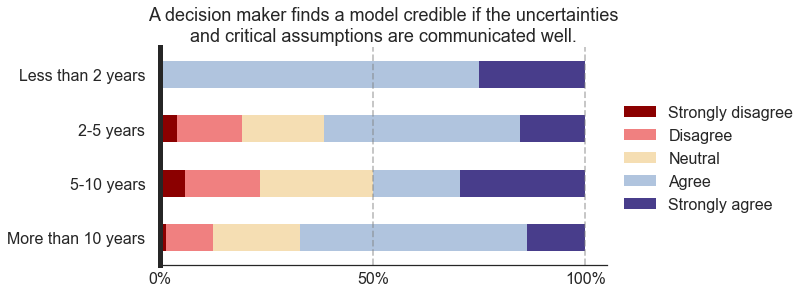

In [159]:
sns.set_style("white")
fig, ax = plt.subplots()
fig.set_figheight(4)

ax.axvline(x=0.5, ls='dashed', color='grey', alpha=.5)
ax.axvline(x=1, ls='dashed', color='grey', alpha=.5)

df_con.plot(ax=ax, kind='barh', stacked=True, color = colors, width=.5)

ax.set_xticks([0, .5, 1])
ax.set_xticklabels(['0%', '50%', '100%'], fontsize=16)
ax.legend(loc=1, ncol=1, fontsize=16, bbox_to_anchor=(1.45, .8))

ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)
ax.tick_params(axis='y', which='major', pad=15)
ax.spines['left'].set_linewidth(5)
sns.despine()
lines = textwrap.wrap(questions5[question-1][3:], 60)
title = '\n'.join(lines)
ax.set_title(title, fontsize=18)
plt.savefig(directory+'Question5_{}_Likert_{}.png'.format(question, factor), dpi=600, bbox_inches='tight')
plt.show()

In [122]:
# get the contingency tables
df_con5_1 = pd.read_excel(directory+'Contingency_Q5_v2.xlsx', sheet_name='Q_2_Role')
df_con5_2 = pd.read_excel(directory+'Contingency_Q5_v2.xlsx', sheet_name='Q_8_Experience')
df_con7 = pd.read_excel(directory+'Contingency_Q7.xlsx', sheet_name='Q_1_Experience')

In [34]:
df_con5_1

,Strongly agree,Agree,Neutral,Disagree,Strongly disagree
Both,28,26,6,6,0
Developer,24,21,3,2,1
None,2,2,0,0,0
User,5,7,10,3,0


In [36]:
df_con5_1.sum(axis=1)

Both         66
Developer    51
None          4
User         25
dtype: int64

In [37]:
df_con5_1.div(df_con5_1.sum(axis=1), axis=0)

,Strongly agree,Agree,Neutral,Disagree,Strongly disagree
Both,0.424242,0.393939,0.090909,0.090909,0.000000
Developer,0.470588,0.411765,0.058824,0.039216,0.019608
None,0.500000,0.500000,0.000000,0.000000,0.000000
User,0.200000,0.280000,0.400000,0.120000,0.000000


In [7]:
#BUBBLE GRAPH FOR FACTORS VS RESPONSES
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")

import numpy as np
import matplotlib.colors as colors

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap



def bubble(df, question, file_name, factor):
        
    #reorder  the columns
    df = df[list(replace_dic.keys())[::-1]]
    
    #normalize the df for each row
    df2 = df.div(df.sum(axis=1), axis=0)
    
    #make 2-d lists
    x, y, size, color = [], [], [], []

    for i, index in enumerate(df.index):
        for j, col in enumerate(df.columns[::-1]):
            x.append(j)
            y.append(i)
            size.append(df2.loc[index, col])
            color.append(df.loc[index, col])

    size = [(7000*s) for s in size]    

    figure, ax = plt.subplots()
    figure.set_figwidth(7)
    figure.set_figheight(5)
    
    cmap = plt.get_cmap('Reds')
    new_cmap = truncate_colormap(cmap, 0.2, 1)

    ax.scatter(x=x, y=y, alpha=0.6, s=size, c=color, cmap=new_cmap)

    #ax.set_xlabel(question, fontsize=18)
    ax.set_ylabel(factor, fontsize=18, fontweight='bold')

    ax.set_xticks([0, 1, 2, 3, 4])
    ax.set_xticklabels(df.columns[::-1], fontsize=16, rotation=60)
    ax.set_yticks([0, 1, 2, 3])
    ax.set_yticklabels(df.index, fontsize=16)
    ax.set_ylim([-0.5, 3.5])
    ax.set_xlim([-0.5, 4.5])

    lines = textwrap.wrap(question[3:], 60)
    title = '\n'.join(lines)
    ax.set_title(title, fontsize=18, fontweight='bold')
    #plt.tight_layout()
    plt.savefig(directory+'{}.png'.format(file_name), dpi=600, bbox_inches='tight')
    plt.show()
    
    


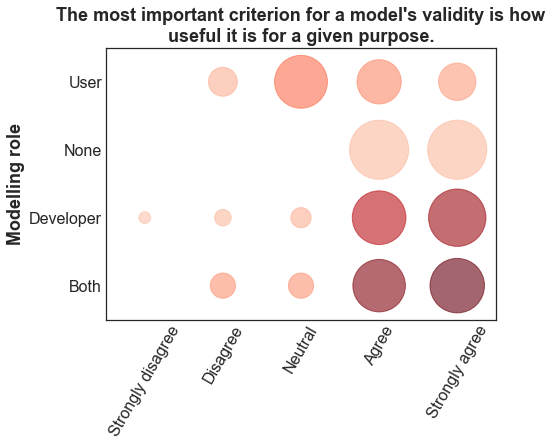

In [148]:
bubble(df_con5_1, questions5[1], 'Q5_2', 'Modelling role')

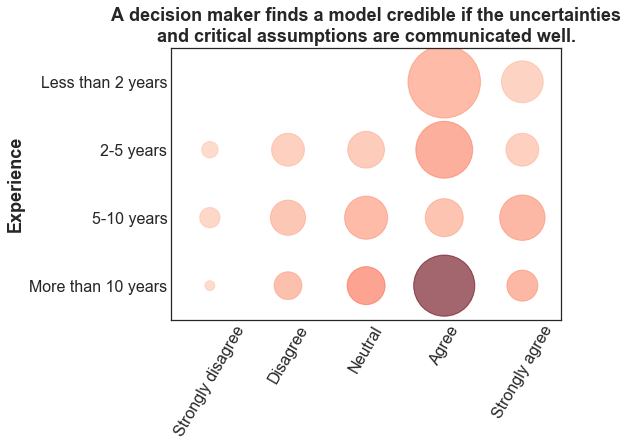

In [151]:
bubble(df_con5_2, questions5[-1], 'Q5_8', 'Experience')

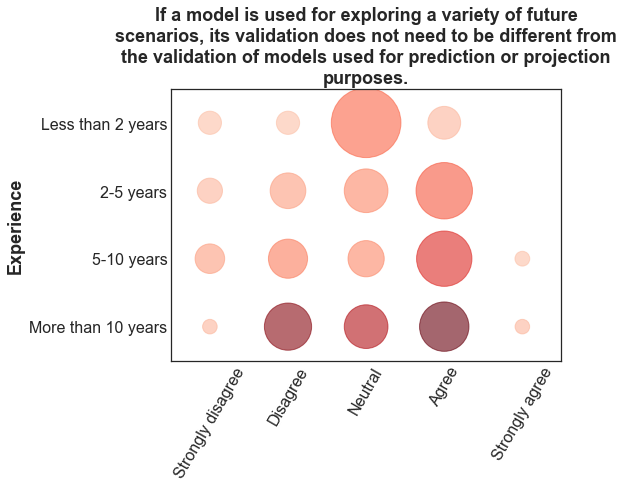

In [152]:
df_con7 = df_con7.reindex(experience)
bubble(df_con7, questions7[0], 'Q7_1', 'Experience')

In [150]:
df_con5_2 = df_con5_2.reindex(experience)
df_con5_2

,Agree,Neutral,Strongly agree,Disagree,Strongly disagree
More than 10 years,39,15,10,8,1
5-10 years,7,9,10,6,2
2-5 years,12,5,4,4,1
Less than 2 years,9,0,3,0,0


In [3]:
#to install an R package

# import rpy2.robjects.packages as rpackages
# utils = rpackages.importr('utils')

# utils.chooseCRANmirror(ind=1) # select the first mirror in the list

# packnames = ('stats')
# from rpy2.robjects.vectors import StrVector
# utils.install_packages(StrVector(packnames))

rpy2.rinterface.NULL

## Modeling area vs. techniques

In [101]:
# bubble graph
df_method = pd.DataFrame(index=area_cols, columns=method_cols)

for area in area_cols:
    for method in df_method.columns:
        df_dummy = df[df[area]==1]
        print(df_dummy.shape)
        df_dummy = df_dummy[df_dummy[method]==1]
        print(area, method, df_dummy.shape[0])
        df_method.loc[area, method] = df_dummy.shape[0]
    

(37, 43)
Hydrology & water management Comparison to historical data 32
(37, 43)
Hydrology & water management Expert consultation 16
(37, 43)
Hydrology & water management Peer review 13
(37, 43)
Hydrology & water management Sensitivity analysis / Stress testing 32
(37, 43)
Hydrology & water management Reality checks (whether the model produces the expected output under predefined conditions) 24
(37, 43)
Hydrology & water management Other - method 6
(57, 43)
Agriculture & ecosystems Comparison to historical data 42
(57, 43)
Agriculture & ecosystems Expert consultation 24
(57, 43)
Agriculture & ecosystems Peer review 26
(57, 43)
Agriculture & ecosystems Sensitivity analysis / Stress testing 45
(57, 43)
Agriculture & ecosystems Reality checks (whether the model produces the expected output under predefined conditions) 35
(57, 43)
Agriculture & ecosystems Other - method 9
(51, 43)
Energy Comparison to historical data 32
(51, 43)
Energy Expert consultation 28
(51, 43)
Energy Peer review 19
(

In [51]:
df_method

,Comparison to historical data,Expert consultation,Peer review,Sensitivity analysis / Stress testing,Reality checks (whether the model produces the expected output under predefined conditions),Other - method
Hydrology & water management,32,16,13,32,24,6
Agriculture & ecosystems,42,24,26,45,35,9
Energy,32,28,19,39,32,5
Urban development,9,8,4,11,9,3
Transport,10,9,8,14,13,2
Climate,31,20,19,33,28,7
Demography,10,8,6,8,10,1
Air,8,7,5,9,9,1
Economy and finance,33,23,18,37,32,6
Social dynamics,23,16,16,20,28,3


In [102]:
df_method_n = df_method.div(df_method.max(axis=1), axis=0)
df_method_n

,Comparison to historical data,Expert consultation,Peer review,Sensitivity analysis / Stress testing,Reality checks (whether the model produces the expected output under predefined conditions),Other - method
Hydrology & water management,1,0.5,0.40625,1,0.75,0.1875
Agriculture & ecosystems,0.933333,0.533333,0.577778,1,0.777778,0.2
Energy,0.820513,0.717949,0.487179,1,0.820513,0.128205
Urban development,0.818182,0.727273,0.363636,1,0.818182,0.272727
Transport,0.714286,0.642857,0.571429,1,0.928571,0.142857
Climate,0.939394,0.606061,0.575758,1,0.848485,0.212121
Demography,1,0.8,0.6,0.8,1,0.1
Air,0.888889,0.777778,0.555556,1,1,0.111111
Economy and finance,0.891892,0.621622,0.486486,1,0.864865,0.162162
Social dynamics,0.821429,0.571429,0.571429,0.714286,1,0.107143


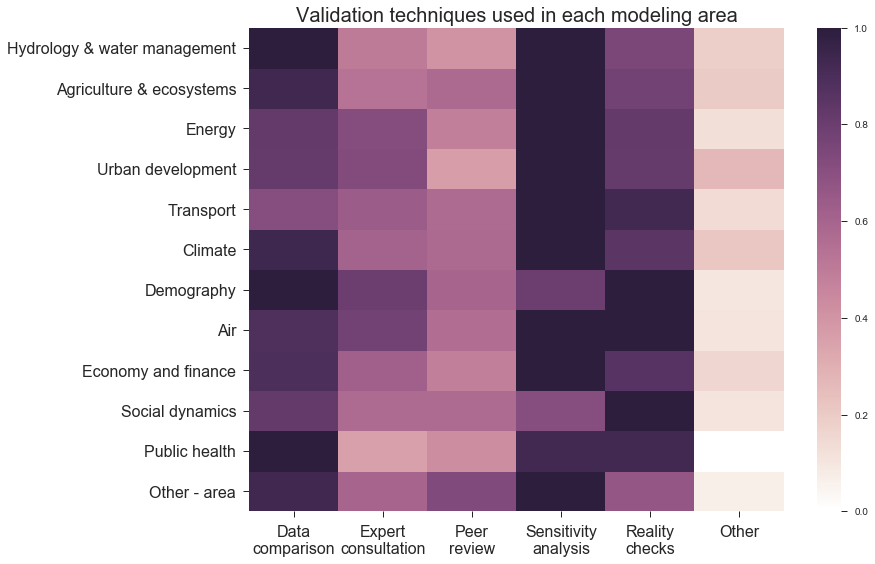

In [57]:
import itertools

sns.set_style("ticks")
figure, ax = plt.subplots()
figure.set_figwidth(13)
figure.set_figheight(8)

df_method_n = df_method_n[df_method.columns].astype(float)

ax = sns.heatmap(df_method_n, cmap=sns.cubehelix_palette(light=1, as_cmap=True))

xlabels = ['Data\ncomparison', 'Expert\nconsultation',
           'Peer\nreview', 'Sensitivity\nanalysis', 
            'Reality\nchecks', 'Other']


ax.set_xticklabels(xlabels, fontsize=16, rotation='horizontal')
ax.set_yticklabels(reversed(area_cols), fontsize=16, rotation='horizontal')

ax.set_title('Validation techniques used in each modeling area', fontsize=20)
plt.tight_layout()
plt.savefig(directory+'Area_vs_Method_rownormalized.png', dpi=600, bbox_inches='tight')
plt.show()

## Statement comparisons

### Representativeness vs usefullness


In [6]:
contingency = {}
q1 = questions5[0]
q2 = questions5[1]
contingency[q1] = df[q1].dropna(axis=0).value_counts()
contingency[q2] = df[q2].dropna(axis=0).value_counts()

df_contingency = pd.DataFrame.from_dict(contingency, orient='index')
df_contingency.fillna(0, inplace=True)
inv_rep_dic = {v:k for k,v in replace_dic.items()}
df_contingency = df_contingency.rename(columns = inv_rep_dic)
#df_contingency.to_excel(writer, sheet_name='Q_{}_{}'.format(q+1,factor))
df_contingency

,Agree,Strongly agree,Disagree,Neutral,Strongly disagree
1. The most important criterion for a model's validity is how well it represents reality.,73,25,23,19,7
2. The most important criterion for a model's validity is how useful it is for a given purpose.,56,59,11,19,1


In [23]:
df[(df[q1]==2)]

,Academia/Research Institute,Industry,Governmental policy organization,Non-governmental policy organization,Other - organization,Role,Hydrology & water management,Agriculture & ecosystems,Energy,Urban development,...,"1. If a model is used for exploring a variety of future scenarios, its validation does not need to be different from the validation of models used for prediction or projection purposes.",2. The validation of models used for scenario exploration should be based on their output in a baseline scenario.,"3. Model output is more important than the model structure (e.g. assumptions, relationships) for the validity of models used for scenario exploration.",4. The validation of models used for scenario exploration should be based on the resulting scenario ensemble.,5. Model structure is more important than the model output for the validity of models used for scenario exploration.,Logical consistency,Plausibility (likelihood),Diversity,Plausibility (imaginability),Open-Ended Response
Respondent ID,,,,,,,,,,,,,,,,,,,,,


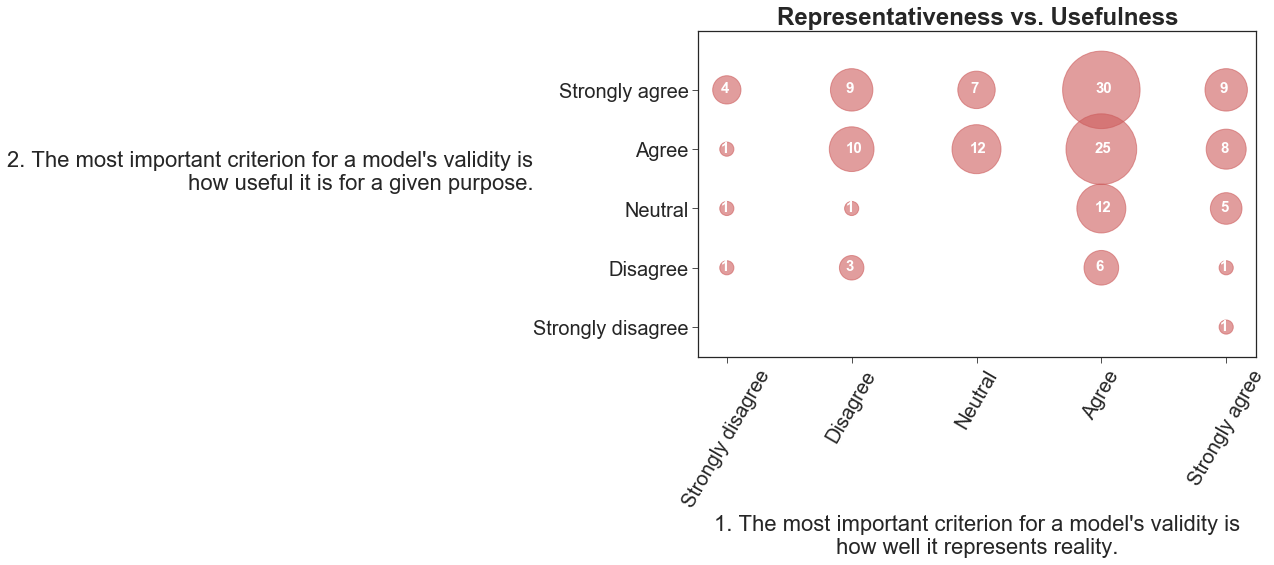

In [41]:
import matplotlib.pyplot as plt
x, y, size = [], [], []
# df_q is where the percentage data for each question is kept/
q1 = questions5[0]
q2 = questions5[1]
ticks = [-2, -1, 0, 1, 2]

for index in ticks:
    for col in ticks:
        x.append(index)
        y.append(col)
        size.append(len(df[(df[q1]==index) & (df[q2]==col)]))

size = [200*(s) for s in size]  
        
figure, ax = plt.subplots()
figure.set_figwidth(10)
figure.set_figheight(6)

ax.scatter(x=x, y=y, alpha=0.6, s=size, c='indianred')

ax.set_xlabel(y_labels5[0], fontsize=22)
ax.set_ylabel(y_labels5[1], fontsize=22, rotation='horizontal', ha='right', labelpad=0.1)

ax.set_xticks(ticks)
ax.set_xticklabels(replace_dic.keys(), fontsize=20, rotation=60)
ax.set_yticks(ticks)
ax.set_yticklabels(replace_dic.keys(), fontsize=20)
ax.set_ylim([-2.5, 3])

for i, s in enumerate(size):
    ax.annotate(int(s/200), (x[i]-.05, y[i]-0.05), color='white', fontsize=15, fontweight='bold')

ax.set_title("Representativeness vs. Usefulness", fontsize=24, fontweight='bold')
#plt.tight_layout()
plt.savefig(directory+'RepresentativenessUsefulness.png', dpi=600, bbox_inches='tight')
plt.show()

In [1]:
import matplotlib.pyplot as plt
x, y, size = [], [], []

#THE CODE BELOW IS CUSTOMIZED FOR EACH ROLE

q1 = questions5[0]
q2 = questions5[1]
ticks = [-2, -1, 0, 1, 2]
df_role = df[df['Role']=='Both']
for index in ticks:
    for col in ticks:
        x.append(index)
        y.append(col)
        size.append(len(df_role[(df_role[q1]==index) & (df_role[q2]==col)]))

size = [300*(s) for s in size]  
        
figure, ax = plt.subplots()
figure.set_figwidth(10)
figure.set_figheight(6)

ax.scatter(x=x, y=y, alpha=0.6, s=size, c='indianred')

ax.set_xlabel(y_labels5[0], fontsize=22)
ax.set_ylabel(y_labels5[1], fontsize=22, rotation='horizontal', ha='right', labelpad=0.1)

ax.set_xticks(ticks)
ax.set_xticklabels(replace_dic.keys(), fontsize=20, rotation=60)
ax.set_yticks(ticks)
ax.set_yticklabels(replace_dic.keys(), fontsize=20)
ax.set_ylim([-2.5, 3])

for i, s in enumerate(size):
    ax.annotate(int(s/200), (x[i]-.05, y[i]-0.05), color='white', fontsize=15, fontweight='bold')

ax.set_title("Representativeness vs. Usefulness (Both roles)", fontsize=24, fontweight='bold')
#plt.tight_layout()
plt.savefig(directory+'RepresentativenessUsefulness_Both.png', dpi=600, bbox_inches='tight')
plt.show()

NameError: name 'questions5' is not defined

### Representativeness and prediction

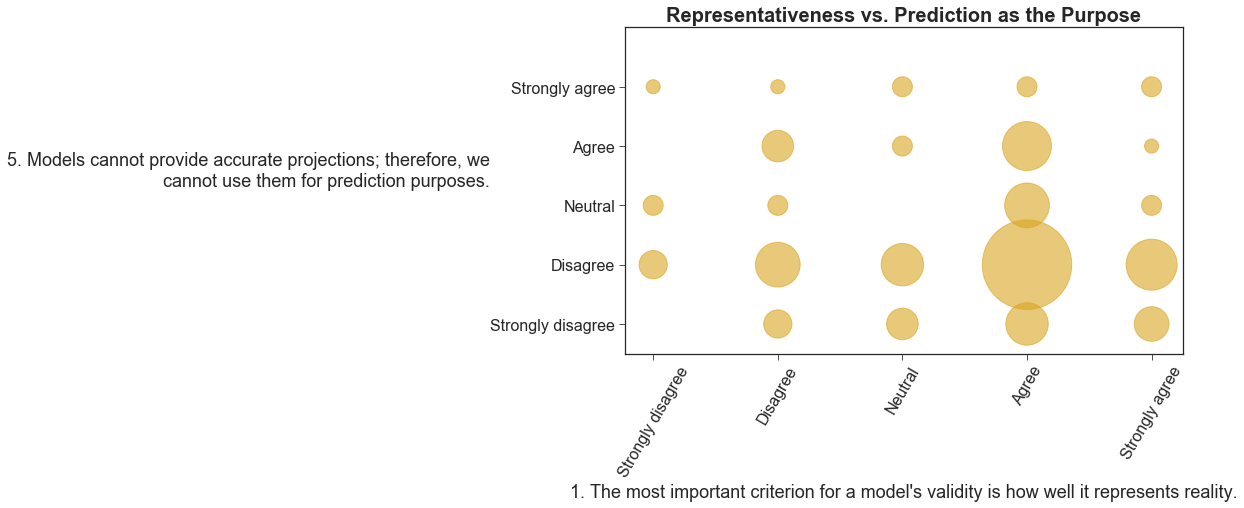

In [27]:
q1 = questions5[0]
q2 = questions5[4]
x, y, size = [], [], []

ticks = [-2, -1, 0, 1, 2]

for index in ticks:
    for col in ticks:
        x.append(index)
        y.append(col)
        size.append(len(df[(df[q1]==index) & (df[q2]==col)]))

size = [200*(s) for s in size]    
        
figure, ax = plt.subplots()
figure.set_figwidth(10)
figure.set_figheight(6)

ax.scatter(x=x, y=y, alpha=0.6, s=size, c='goldenrod')

ax.set_xlabel(q1, fontsize=18)
ax.set_ylabel(y_labels5[4], fontsize=18, rotation='horizontal', ha='right', labelpad=0.1)

ax.set_xticks(ticks)
ax.set_xticklabels(replace_dic.keys(), fontsize=16, rotation=60)
ax.set_yticks(ticks)
ax.set_yticklabels(replace_dic.keys(), fontsize=16)
ax.set_ylim([-2.5, 3])

ax.set_title("Representativeness vs. Prediction as the Purpose", fontsize=20, fontweight='bold')
#plt.tight_layout()
plt.savefig(directory+'RepresentativenessPrediction.png', dpi=600, bbox_inches='tight')
plt.show()

### Historical data 

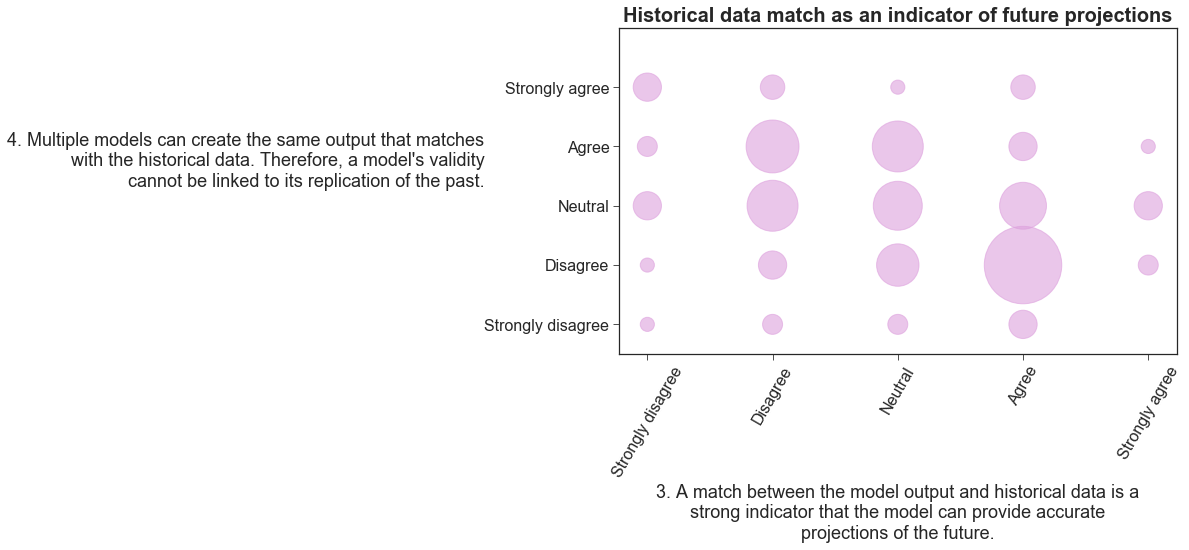

In [28]:
q1 = questions5[2]
q2 = questions5[3]
x, y, size = [], [], []

ticks = [-2, -1, 0, 1, 2]

for index in ticks:
    for col in ticks:
        x.append(index)
        y.append(col)
        size.append(len(df[(df[q1]==index) & (df[q2]==col)]))

size = [200*(s) for s in size]    
        
figure, ax = plt.subplots()
figure.set_figwidth(10)
figure.set_figheight(6)

ax.scatter(x=x, y=y, alpha=0.6, s=size, c='plum')

ax.set_xlabel(y_labels5[2], fontsize=18)
ax.set_ylabel(y_labels5[3], fontsize=18, rotation='horizontal', ha='right', labelpad=0.1)

ax.set_xticks(ticks)
ax.set_xticklabels(replace_dic.keys(), fontsize=16, rotation=60)
ax.set_yticks(ticks)
ax.set_yticklabels(replace_dic.keys(), fontsize=16)
ax.set_ylim([-2.5, 3])

ax.set_title("Historical data match as an indicator of future projections", fontsize=20, fontweight='bold')
#plt.tight_layout()
plt.savefig(directory+'HistoricalData.png', dpi=600, bbox_inches='tight')
plt.show()

### Structure vs. Output

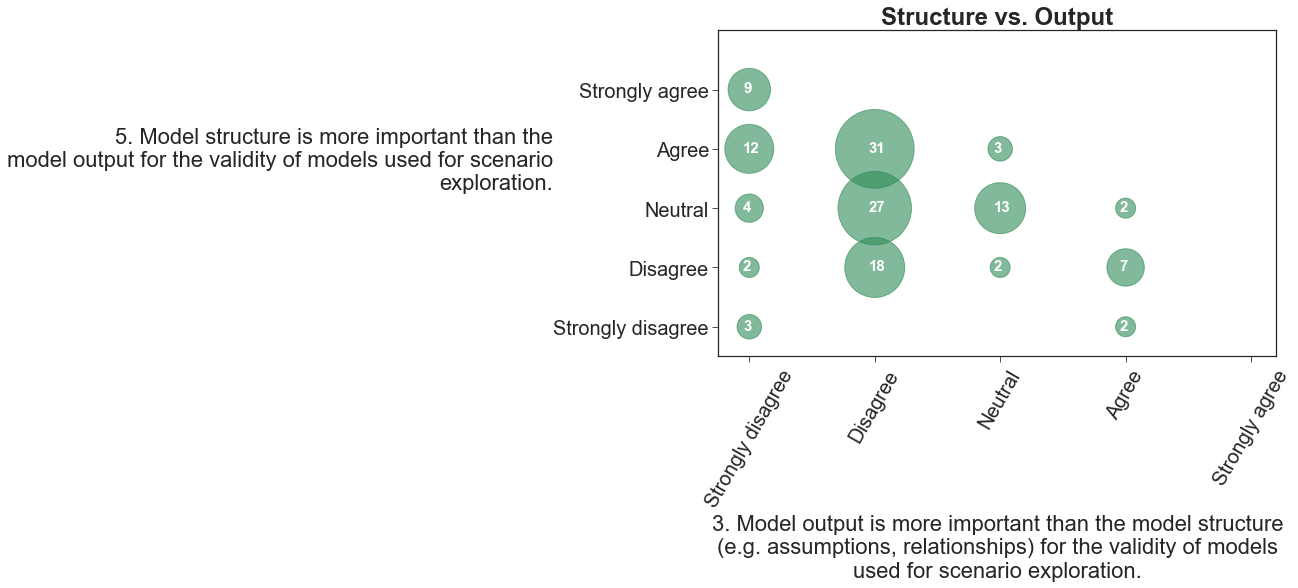

In [43]:
q1 = questions7[2]
q2 = questions7[4]
x, y, size = [], [], []

ticks = [-2, -1, 0, 1, 2]

for index in ticks:
    for col in ticks:
        x.append(index)
        y.append(col)
        size.append(len(df[(df[q1]==index) & (df[q2]==col)]))

size = [200*(s) for s in size]    
        
figure, ax = plt.subplots()
figure.set_figwidth(10)
figure.set_figheight(6)

ax.scatter(x=x, y=y, alpha=0.6, s=size, c='seagreen')

ax.set_xlabel(y_labels7[2], fontsize=22)
ax.set_ylabel(y_labels7[4], fontsize=22, rotation='horizontal', ha='right', labelpad=0.1)

ax.set_xticks(ticks)
ax.set_xticklabels(replace_dic.keys(), fontsize=20, rotation=60)
ax.set_yticks(ticks)
ax.set_yticklabels(replace_dic.keys(), fontsize=20)
ax.set_ylim([-2.5, 3])

for i, s in enumerate(size):
    ax.annotate(int(s/200), (x[i]-.05, y[i]-0.05), color='white', fontsize=15, fontweight='bold')

    ax.set_title("Structure vs. Output", fontsize=24, fontweight='bold')

#plt.tight_layout()
plt.savefig(directory+'Structure_vsOutput.png', dpi=600, bbox_inches='tight')
plt.show()